<a href="https://colab.research.google.com/github/MuhammadShaheer-khan/Python-For-Finance-Stock-Analysis/blob/master/Stock_Price_Prediction_%26_Forecasting_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math

In [2]:
df = pdr.get_data_tiingo("AAPL", api_key="228ddadcc62071ee6ddf47e97a9479350f804127")

In [3]:
df.to_csv("AAPL.csv")

In [4]:
df = pd.read_csv("AAPL.csv")

In [5]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-02-01 00:00:00+00:00,96.43,96.71,95.40,96.47,40943541,22.332087,22.396932,22.093551,22.341350,163774164,0.00,1.0
1,AAPL,2016-02-02 00:00:00+00:00,94.48,96.04,94.28,95.42,37357215,21.880489,22.241767,21.834171,22.098182,149428860,0.00,1.0
2,AAPL,2016-02-03 00:00:00+00:00,96.35,96.84,94.08,95.00,45964294,22.313560,22.427038,21.787854,22.000915,183857176,0.00,1.0
3,AAPL,2016-02-04 00:00:00+00:00,96.60,97.33,95.19,95.86,46471652,22.491883,22.661853,22.163585,22.319585,185886608,0.52,1.0
4,AAPL,2016-02-05 00:00:00+00:00,94.02,96.92,93.69,96.52,46418064,21.891168,22.566390,21.814333,22.473256,185672256,0.00,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-01-25 00:00:00+00:00,142.92,145.09,136.54,143.07,157611713,142.92,145.09,136.54,143.07,157611713,0.0,1.0
1255,AAPL,2021-01-26 00:00:00+00:00,143.16,144.30,141.37,143.60,98390555,143.16,144.30,141.37,143.60,98390555,0.0,1.0
1256,AAPL,2021-01-27 00:00:00+00:00,142.06,144.30,140.41,143.43,140843759,142.06,144.30,140.41,143.43,140843759,0.0,1.0
1257,AAPL,2021-01-28 00:00:00+00:00,137.09,141.99,136.70,139.52,142621128,137.09,141.99,136.70,139.52,142621128,0.0,1.0
1258,AAPL,2021-01-29 00:00:00+00:00,131.96,136.74,130.21,135.83,177523812,131.96,136.74,130.21,135.83,177523812,0.0,1.0


In [7]:
df2 = df.reset_index()["close"]

In [8]:
df2[1128:]

1128    370.46
1129    379.24
1130    373.01
1131    380.16
1132    384.76
         ...  
1254    142.92
1255    143.16
1256    142.06
1257    137.09
1258    131.96
Name: close, Length: 131, dtype: float64

In [9]:
df2.shape

(1259,)

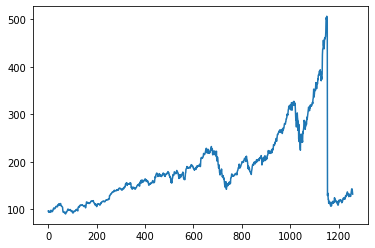

In [10]:
plt.plot(df2)

In [11]:
df2

0        96.43
1        94.48
2        96.35
3        96.60
4        94.02
         ...  
1254    142.92
1255    143.16
1256    142.06
1257    137.09
1258    131.96
Name: close, Length: 1259, dtype: float64

In [12]:
# LSTM are sensative to the scale of the data.  So we apply MinMaxScaler to convert val b/w 0 to 1

scaler = MinMaxScaler(feature_range = (0, 1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1, 1))

In [13]:
df2

array([[0.01464823],
       [0.00995791],
       [0.0144558 ],
       ...,
       [0.12440168],
       [0.11244738],
       [0.10010824]])

In [14]:
# Split data in train and test
training_size = int(len(df2) * 0.65)
test_size = len(df2) - training_size
train_data, test_data = df2[0:training_size,:], df2[training_size: len(df2), :1]

In [15]:
training_size, test_size

(818, 441)

In [16]:
# Create an array od values into a dataset matrix

def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i + time_step), 0]      # i = 0,  0,1,2,3 ----100
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [17]:
# Reshape into X=t, t+1, t+2 t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
print(X_train)

[[0.01464823 0.00995791 0.0144558  ... 0.01144919 0.01339747 0.01253157]
 [0.00995791 0.0144558  0.01505713 ... 0.01339747 0.01253157 0.01385448]
 [0.0144558  0.01505713 0.00885147 ... 0.01253157 0.01385448 0.00736019]
 ...
 [0.21457607 0.21224293 0.22725195 ... 0.28175586 0.28098617 0.27646422]
 [0.21224293 0.22725195 0.20769693 ... 0.28098617 0.27646422 0.27410704]
 [0.22725195 0.20769693 0.20295851 ... 0.27646422 0.27410704 0.27485268]]


In [19]:
print(X_test)

[[0.2857727  0.29202646 0.28416115 ... 0.31417919 0.3064101  0.30879134]
 [0.29202646 0.28416115 0.27064342 ... 0.3064101  0.30879134 0.30628984]
 [0.28416115 0.27064342 0.27073963 ... 0.30879134 0.30628984 0.31434756]
 ...
 [0.10544799 0.09876127 0.07345761 ... 0.11191822 0.11720986 0.12647023]
 [0.09876127 0.07345761 0.07365003 ... 0.11720986 0.12647023 0.1270475 ]
 [0.07345761 0.07365003 0.05407096 ... 0.12647023 0.1270475  0.12440168]]


In [20]:
X_test.shape

(340, 100)

In [21]:
y_test.shape

(340,)

In [22]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer = "adam")

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=105, batch_size=64, verbose=1)

Epoch 1/105
12/12 [==============================] - 8s 277ms/step - loss: 0.0151 - val_loss: 0.0541
Epoch 2/105
12/12 [==============================] - 2s 169ms/step - loss: 0.0028 - val_loss: 0.0242
Epoch 3/105
12/12 [==============================] - 2s 166ms/step - loss: 0.0017 - val_loss: 0.0243
Epoch 4/105
12/12 [==============================] - 2s 166ms/step - loss: 5.5216e-04 - val_loss: 0.0204
Epoch 5/105
12/12 [==============================] - 2s 179ms/step - loss: 4.6975e-04 - val_loss: 0.0198
Epoch 6/105
12/12 [==============================] - 2s 170ms/step - loss: 4.1072e-04 - val_loss: 0.0197
Epoch 7/105
12/12 [==============================] - 2s 170ms/step - loss: 3.8138e-04 - val_loss: 0.0189
Epoch 8/105
12/12 [==============================] - 2s 169ms/step - loss: 3.8376e-04 - val_loss: 0.0186
Epoch 9/105
12/12 [==============================] - 2s 170ms/step - loss: 3.2451e-04 - val_loss: 0.0183
Epoch 10/105
12/12 [==============================] - 2s 173ms/step

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.4.1'

In [28]:
# Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
# Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

162.68175867614173

In [31]:
math.sqrt(mean_squared_error(y_test, test_predict))

263.16979567721637

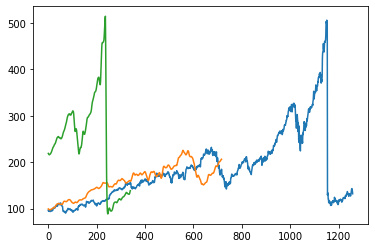

In [32]:
# Plotting the predictions
## Shift train predictions for plotting

look_back = 100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

## Shift test predictions for plotting

testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(df2) - 1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(train_predict)
plt.plot(test_predict)
plt.show()

## Predict the future 30 days

In [33]:
len(test_data)

441

In [34]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape

(1, 100)

In [35]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [36]:
# Demostrate prediction for the next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):

  if (len(temp_input) > 100):
    # Print(temp_input)
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    # print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print (temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

[0.12187222]
101
1 day input [0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103
 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925
 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0

In [37]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [38]:
len(df2)

1259

In [39]:
df3 = df2.tolist()
df3.extend(lst_output)

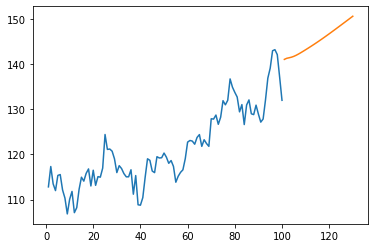

In [42]:
plt.plot(day_new, scaler.inverse_transform(df2[1159:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))